# Understanding of Natural Language Processing (NLP) applications and Algorithms
##### NJIT BDS 725 Independent Study 
##### Author: Alvaro Aguado; alvaroaguado3@gmail.com

**Abstract:** During this semester I worked on developing a better understanding of NLP applications and algorithms and how they can be used for multiple applications in business and marketing. Initially our goal was to develop one algorithm for a novel solution in the field. Instead, I created 2 different algorithms that try to solve different instances with text and images. 
Our first algorithm used NLP to predict Amazon review rating based on the language that the user included. This approach used Bag-of-words (BOW) and shrinkage regression to predict star rating.
Our second algorithm uses Image processing to predict yelp rating based on the type of picture that was included. This approach used convolutional neural networks (covnets) to extract features and organize the images and predict a given rating.    

## 1- Introduction

Natural Language Processing (NLP) is a rather complex task for Machine Learning applications. NLP relies linguistic science which aims to characterize and explain the multitude of linguistic observations circling around us, in conversations, writing and other media. In NLP we are trying to understand (probabilistically) the rules that govern linguistic expressions and be able to make inferences around the intent of the entity transmitting the message. 

In Information Theory (Shannon 1948), the aim is to optimize the accuracy of the communication between two entities in the presence of noise in the channel. 
&nbsp;

<figure class="image">
  <center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/Channel_model.svg/1200px-Channel_model.svg.png"></center>
  <center><figcaption>The noisy channel model developed by Shannon 1948</figcaption></center>
</figure>
&nbsp;
&nbsp;

According to this definition we reach a channel's capacity if we manage to designa n input code X whose distribution maximizes the mutual information between the input and the output over all possible distributions p(X). 
Albeit of heated debate regarding its validity among NLP researchers, the noisy channel is an elegant mathematical framework that has inspired significant amount of important research. Other problems in NLP can be seen as instantaitions of the decoding problem. 


| Application | Input | Output | p(i) | p(o &#124; i) |
|---|---|---|---|---|
|Machine Translation           | L1 word sequences	|L2 word sequences                |	P(L1) in a language model       |	Translation model  |
|Optical Character             | Recognition        |	Actual text	Text with mistakes|	Prob of language text           |	Model of OCR errors|
|Part of Speech (POS) tagging  | POS tag sequences  |	English words                 |	Prob of POS sequences           |	p(w &#124; t)             |
|Speech recognition            | Word sequences     |	Speech signal                 |	Prob of word sequence           |	Acoustic model     |
|*Sentiment Analysis*            | *Word sequences*     |	*Sequences with sarcasm*        |	*Prob Positive/Negative sentiment* |	*Sentiment Model*    |

Another important property of text that we will be including in our analyses will be perplexity or cross entropy of the message. Perplexity is a measurement of how well a probability distribution predicts a sample. In other words, when we see a perplexity value of $k$ instead of $v$ (where $k<v$) it means we are we are as surprised on average as we would be to if we had to guess between k equiprobable choices at each step. 

Perplexity is defined as: $$PP(p) = 2^H(p) $$
where H is entropy and p is the probability distribution of the linguistic structure we are trying to model. The lower the perplexity we can achieve in the topics we are analyzing, the more likely we are to predict correctly the message that we are analyzing.



## 2- Lit Review and Motivation

I started my research semester reading through the literature on Natural Language processing. 

First I read, *Automated Text Analysis for Consumer Research* Humphreys et Wang 2020. This paper talks about Consumer discussions on the internet, product reviews, and digital archives of news articles and press releases are just a few potential sources for insights about consumer attitudes, interaction, and culture. It provides a frame work for NLP applications used nowadays. One of the main figures that I found interesting from this work was the differences in the dictionaries used for different purposes. In NLP, the common approach is to breakout text into n-grams, then this text is standarized, which includes removing stop-words, treating special characters, categorization of word collocation which are combination of words that have a different meaning when together in the sentence, etc.) and stemmed/lemmatized in order to simplify the text construct into the key ideas (reducing perplexity of the models). 

Once the text can be more easily diggested its matched against 'Dictionaries', which are constructs that map specific n-grams with certain tags or associations. These dictionaries are built with the idea of direct correlation between an n-gram and a specific category. However these kinds of associations could be misleading given that the token (or n-gram) could mean or map to different categories depending on the position its placed within the text. A list of the different dictionaries can be found below from the article

<figure class="image">
  <center><img src ="https://www.researchgate.net/profile/Rebecca_Wang9/publication/324495873/figure/tbl1/AS:677971568365570@1538652426716/STANDARDIZED-DICTIONARIES_W640.jpg"></center>
</figure>

One of the main uses I applied this article was to use NRT pre-built lexica in order to develop our 3rd algorithm.


The second main read was - *Uniting the Tribes: Using Text for Marketing Insight* (2020 Berger et al). This paper is a compilation the most recent developments in NLP along with the main areas of developments moving forward. The authors overview methodologies and metrics used in text analysis, providing a set of guidelines and procedures. Finally, they further highlight some common metrics and challenges and discuss how researchers can address issues of internal and external validity. I liked this read on different applications mainly from an application perspective. How's NLP being used from a Text Producer and Text Receivers perspective.

This analysis developed a clear picture of the different algorithms and the real world applications they can be used for. In a sense, this provided me with ideas on how to apply new algorithms to cover needs that were not currently being tackled in the scientific community. 


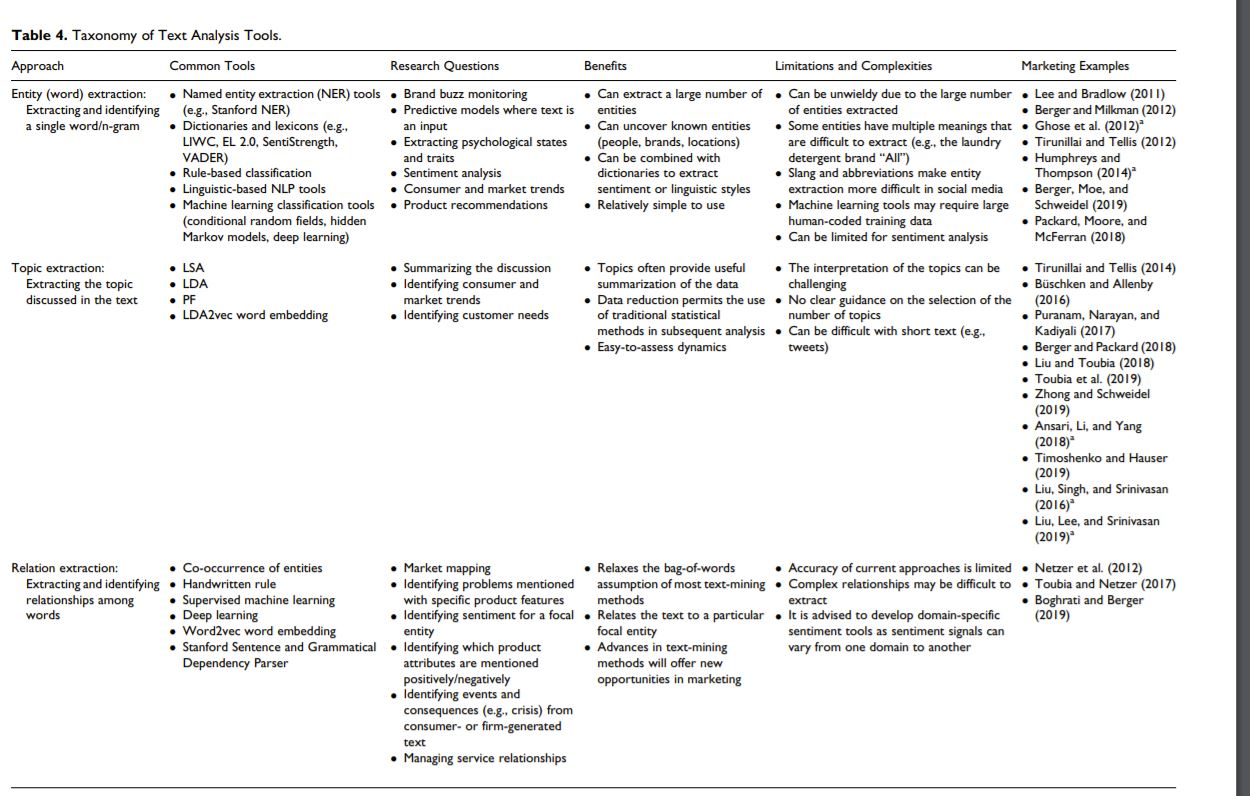

In [3]:
from IPython.display import Image
Image(filename="./Figures/Taxonomy_of_algorithms.JPG") 

Among other articles, one that finally sparked project ideas was the article on "Visual sentiment analysis for review images with item-oriented and user-oriented CNN" ([2017, Truong and Lauw](https://core.ac.uk/download/pdf/145236835.pdf)). In this paper, the authors take images from Yelp reviews and are able to extrapolate sentiment from the features that are included in the images. In their approach they used images from reviews in order to extrapolate the sentiment of the authors of those reviews. In order to do this, they linked the images to the actual rating (in terms of total stars) and categorized the images that review rating. The approach requires a lot of computer power because it requires creating convolutional neural networks that simplify the the images into features that can be then clustered into groups, then the images are categorized into sentiment with the help of the rating. 

We will explain in Algorithm 3, how we took ideas from this approach to build our model. 

## 3- Course Calendar and key learnings Summary
<p>The course calendar for this independent research was structured as follows:</p>

&nbsp;
&nbsp;
**INTRODUCTION**
<p>
1.	 Literature Review – Current NLP application and uses (Berger et al. 2020)

&nbsp;
&nbsp;
**A - LINGUISTIC ESSENTIALS**
2.	 Introduction to NLP and Python NLTK library
3.	 Words, n-gram models and Lexical Acquisition
4.	 Grammar, Markov Models, Part of Speech
5.	 Probabilistic Context, Applications and Techniques 

&nbsp;
&nbsp;
**B - APPLICATION TECHNIQUES (basic to advanced)**
6.	 Vector Space Model and Clustering
7.	 Term distribution models (Poisson, K-mixtures
8.	 Latent Semantic Indexing, Discourse segmentation
9.	 Maximum Entropy Models and Tree Models
10.	 Word2vec and LSA (Latent Semantic Analysis)
11.	 Sequential NLP and Memory (RNN and LSTM models)

&nbsp;
&nbsp;
**PROJECT CAPSTONE**
12.	 Project Capstone: Data Collection and Preparation
13.	 Project Capstone: Data Cleaning and Descriptive analysis
14.  Project Capstone: Model Training and Testing
15.  Project Capstone: Model Deployment 
</p>

### 3A- Learnings on Linguistic Essentials

In this section I started familiarizing myself with the different tools and procedures that can be used for Natural Language Processing. I started reading the online documentation on the package [NLTK](https://www.nltk.org/)

I developed an understanding of the tokenization procedures, which includes using n-grams (normally unigrams) while removing special characters. Also working ways to process **Hyphenation** which are different forms for representing the same word. Also I developed a better understanding of Lemmatization and Stemming.
<ul>
<p> **Example of Stemming process:** </p>
<img src="https://blog.bitext.com/hs-fs/hubfs/stemming_v2.png?width=248&amp;height=130&amp;name=stemming_v2.png" align='center'/>
</ul>

<ul>
<p>**Example of Lemmatization process:**</p>
<img width="624" height="450" src="https://searchingforbole.files.wordpress.com/2018/01/re-learning-english-multiple1.png?w=624"/>
</ul>
&nbsp;
&nbsp;

I learned how to create Part of Speech analysis, although it wasn't at the core of any of the algorithms. The reason is because the data that I used for my algorithms was based on social media data which incorporates a lot of text that is not gramatically correct or are ungrammatical. It also includes several pieces that may contain sarcasm or slang which changes the meaning or uses of some words in the text. For this many of the applications are created based on probabilistic distributions generated from the data it was collected from. 

Here's where the concept of entropy comes in handy. ENtropy measures the amount of information in a random variable.
$$ H(p) = H(X) = -\sum_{x \in X}{p(x)\log_2 p(x)} $$

where $p(x)$ is the probability mass function of a random variable $X$ over a discrete set (words, symbols, sentences, etc.) 
This is important because entropy is a measure of uncertainty. The more we know about something, the lower entropy will be because we are less surprised by the outcome of the trial. We can see this as for example in, how surprised we will be when we are trying to predict a word as $p(w|h)$ which can be read as the probability of seeing the next word $w$ given the history of words $h$ seen so far. If the prediction is certain that a word w follows a given history h and it is correct, then the information supplied to the predictor of seeing $w$ is $-\log_2 1= 0$. In other words, the predictor does not experience any surprise at all. On the other hand if the model thinks that $w$ cannot follow $h$, then $m(w|h) = 0$ and the information supplied to the predictor is infinite ($-\log_2 0 = \inf$. The model is infinitely surprised, which is a bad thing. Summing over the surprise of a predictor at each word gives an expression for our total surprise. 
$$H_{total} = - \sum_{j=1}{n} \log_2 m(w_i | w_1, w_2, ..., w_{j-1})$$

For this section I attemped to create a probabilistic model that calculates the next word based on the previous words. I used the methodology from Katz Back-off model.

#### 3A.1 Katz Back off model
"Katz back-off is a generative *n*-gram language model that estimates the conditional probability of a word given its history in the *n*-gram. It accomplishes this estimation by *backing off* through progressively shorter history models under certain conditions." By doing so, the model with the most reliable information about a given history is used to provide the better results.

\begin{aligned}P_{{bo}}(w_{i}\mid w_{{i-n+1}}\cdots w_{{i-1}})={} &{\begin{cases}d_{{w_{{i-n+1}}\cdots w_{{i}}}}{\dfrac  {C(w_{{i-n+1}}\cdots w_{{i-1}}w_{{i}})}{C(w_{{i-n+1}}\cdots w_{{i-1}})}} &{\text{if }}C(w_{{i-n+1}}\cdots w_{i})>k\\[10pt]\alpha _{{w_{{i-n+1}}\cdots w_{{i-1}}}}P_{{bo}}(w_{i}\mid w_{{i-n+2}}\cdots w_{{i-1}}) & {\text{otherwise}}\end{cases}}\end{aligned}

where 

  ${C(x)} = $ number of times x appears in training <br>
  ${w_i} = $ ith word in the given context <br>
  ${d} = $ is the amount of discounting found by [Good-Turing](https://en.wikipedia.org/wiki/Good%E2%80%93Turing) estimation <br>
  
alpha is the normalization of the left-over probability 

  $\alpha = \dfrac {\beta_{w_{{i-n+1}}\cdots w_{{i-1}}}} {\sum_{ \{w_i:C(w_{{i-n+1}}\cdots {{w_i}})\leq k\}} P_{bo}(w_i\mid w_{{i-n+2}}\cdots w_{{i-1}}) } $ <br>
  
  beta here is the left over probability <br>

  $\beta = 1 - \sum_{\{w_i:C(w_{{i-n+1}}\cdots {{w_i}})\leq k\}}^{} d_{{w_{{i-n+1}}\cdots w_{{i}}}} {\dfrac  {C(w_{{i-n+1}}\cdots w_{{i-1}}w_{{i}})}{C(w_{{i-n+1}}\cdots w_{{i-1}})}} $

In simple terms, Katz's Back-off Model is an *n*-gram language model that estimates conditional probability of the next word given its history in the *n*-gram. And *n*-gram is a string containing *n* words. For example, consider the phrase "I want to eat Chinese food." There are the following *n*-grams:

Unigrams: *I; want; to; eat; Chinese; food*

Bigrams: *I want; want to; to eat; eat Chinese; Chinese food*

Trigrams: *I want to; want to eat; to eat Chinese; eat Chinese food*

Four-grams: *I want to eat; want to eat Chinese; to eat Chinese food*

*etc.*

Essentially, this means that if the n-gram has been seen more than $k$ times in training, the conditional probability of a word given its history is proportional to the maximum likelihood estimate of that n-gram. Otherwise, the conditional probability is equal to the back-off conditional probability of the (n-1)-gram.

I created this exercise in a separate notebook called [Katz Back off model]("./Script/Katz_backoff.ipynb")

### 3B- Learnings from Application techniques 

In this section applications and techniques I worked through different implementations of algorithms that help understand better the underlying distribution of the text that we are trying to process. 
First I explored Latent Dirichlet Allocation algorithm which helps organize text into categories or topics based on the perplexity of the tokens contained in the text. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics. 

LDA assumes that Documents are represented as a random mixture over topics $\theta_i$, and that each topic is characterized by a distribution $\varphi_k$ over all the words $w_ij$. These variables can be described as Dirichlet processes 
$$ \varphi_{k=1...K} \sim Dirichlet_{V}(\beta)$$
$$\theta_{d=1...M} \sim Dirichlet_{K}(\alpha) $$
and then the topics $Z$ are defined as
$$Z_{d=1...M,w=1...N_d} \sim Categorical_{K} (\theta_d)$$
$$w_{d=1...M,w=1...N_d} \sim Categorical_{K} (\varphi_d)$$

where categorical is the categorical distribution. Z is the topic, and W is the word. M is the number of documents and N the number of words. 

#### 3B.1 LDA practice model
For this section I created an analysis using the LDA to estimate the different topics in the US presidential elections. I included the github [here]("./Script/LDA Model Elections.txt")

#### 3B.2 word2vec models
Additionally I studied the applications from word embeddings in **word2vec** applications. A word2vec model is a two-layer neural network that takes a text corpus as input and outputs a set of embeddings vectors for words in that corpus. There are two different architectures shown in the following diagram below. 

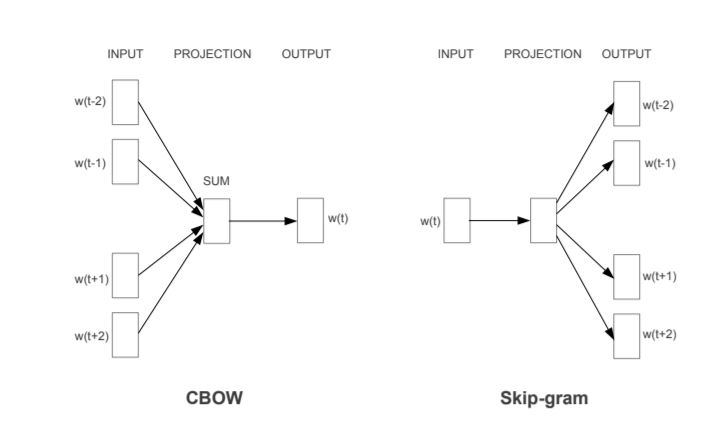

In [4]:
from IPython.display import Image
Image(filename="./Figures/CBOW_and_skipgram.JPG") 

- Continous Bag of Words (CBOW): model predicts the target word using the average of the context word vectors as input so that their order does not matter. CBOW trains faster and tends to be slightly more accurate for frequent terms, but pays less attention to infrequent words. 

- The skip-gram (SG) model, in contrast uses the target word to predict words sampled from the context. It works well with small datasets and finds good representations even for rare words or phrases.

#### 3B.3 Recurrent Neural Networks (RNN) and Long Term Short Term Memory Networks (LSTM)

Finally I studied the work on Recurrent Neural Networks. I couldn't really get very deep in the learnings for this category of algorithms but I was able to grasp how did they work. 
Regular neural networks that are densely connected have no memory. This means that each input shown to them is processed independently with no state kept between the inputs. This is problematic for example with time series, because we have to show the entire sequence at once to the network (as a single vector) and process it in one go. In contrast, RNN take information in cascades, it processes sequences by iterating through the sequence of elements and maintaining a state containing information relative to what it has seen so far. 



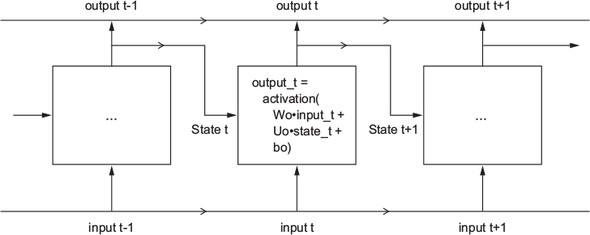

In [5]:
Image(filename="./Figures/RNN_simple.JPG") 

LSTM start from the same principle as RNNs. The main difference is that the information is preserved long term which mitigates partially the problem with the vanishing gradient problem. It saves information for later preventing older signals from gradually vanishing. We can think of LSTMs by using the same diagram as RNN but adding a converyor belt that carries information through all the time steps (Carry track) 

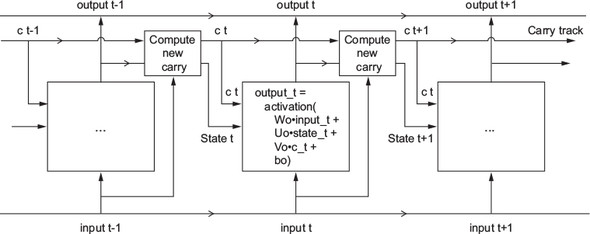

In [6]:
Image(filename="./Figures/LSTM.JPG") 

## 4- Research Projects

Initially the idea was to explore one type of application, but instead I decided to test 3 different algoritmic applications that can be implemented. The reason behind it, is that I had the opportunity to be exposed to different project asks and I ended up including the learnings from this Independent study here. All these algorithms however can be subject to more tests with larger datasets but due to the constraint in time we limited the datasets to a size that was manageable for my personal laptop.

### 4A - Predicting Amazon Rating based on Natural Language Processing

The first one I implemented it in R, so I will show the R code as well as the results in this Notebook, but the access to the application is included [here](...)

#### 4A.1 Context  and Model

Amazon is currently the leading e-commerce site worldwide. The traffic at Amazon is estimated at 2.91 B visits per day,and the average visit duration is around 8 mins (Source: [Similarweb.com](www.similarweb.com)) This means that a lot of consumers use this website and spend signifcant amount checking products and estimating the value of the product based on the reviews. Amazon has always maintained high emphasis on customer satisfaction. Amazon customer reviews about the products are one of the main reasons to attract customers on Amazon. It basically helps them understand almost every detail of the product. 

Normally when a product has less than 4 stars, it means the product has some serious flaw and consumers will start not purchasing the product given the uncertaintly that the lower rating provides. This raises the question about what kind of aspects around the reviews could be predictive of bad reviews. And it also could help companies to extract in an automated fashion those reasons that they need to watch out in order to keep a high star rating. We will do this for a brand at my work and we will see if the implementation could be useful. This brand is "Centrum" Multivitamins

In order to do this we are going to create a model that predicts customer satisfaction, measured as review rating. Our model should be able to identify words that are predictive of the different reviews and also accurately predict out-of-sample reviews. We will create our model to be language agnostic, since it will be trained probabilistically by the train data. 

#### 4A.2 Data Collection

We received the data from a third party vendor. Our dataset has 20669 reviews (rows) and 17 variables. That provides multiple values, including timing of the post, body of text and review rating. There are other variables but we will only focus on those 3 variables for this analysis. 

#### 4A.3 Model 

In order to generate our model we created a document term matrix that contains the different tokens (unigrams) for each one of the reviews. 

|   |review_hash_id_unique                    |word   |
|---|-----------------------------------------|-------| 
| 1 |32bf6344105d3b258f74f742301bf31aed1d4460 |just   |
| 2 |32bf6344105d3b258f74f742301bf31aed1d4460 |start  |
| 3 |32bf6344105d3b258f74f742301bf31aed1d4460 |take   |
| 4 |32bf6344105d3b258f74f742301bf31aed1d4460 |cant   |
| 5 |32bf6344105d3b258f74f742301bf31aed1d4460 |speak  |
| 6 |32bf6344105d3b258f74f742301bf31aed1d4460 |effect |
| 7 |32bf6344105d3b258f74f742301bf31aed1d4460 |hair   |
| 8 |32bf6344105d3b258f74f742301bf31aed1d4460 |skin   |
| 9 |32bf6344105d3b258f74f742301bf31aed1d4460 |support|
|10 |32bf6344105d3b258f74f742301bf31aed1d4460 |supper |

<p>
**This is then converted into the document term matrix that shows the following details.
&nbsp;
    
DocumentTermMatrix (documents: 448, terms: 1181) 
&nbsp;

Non-/sparse entries: 4052/525036
&nbsp;

Sparsity           : 99%
&nbsp;

Maximal term length: 15
&nbsp;

Weighting          : term frequency (tf)**
</p>

Not surprisingly, most of the terms are sparse which means they have low frequency. We can now train this model to get the different topics that belong to each of the categories. This is helpful in order to understand what are some of the topics that people talk about.

Now we converted the data into a sparse matrix (X), and created a target variable (Y) with the number of stars in the review. Each column in the matrix X represents the presence of a word presence in the review $i$. As a result if we were to fit a linear model to the data we will find that we have more words (529088) than rows (20669) in our model. This means that there's not a unique solution for a linear regression. Then we have to mitigate the $p>n$ problem by shrinkage. This means we will penalize those wordss that don't really help predict the review rating. 



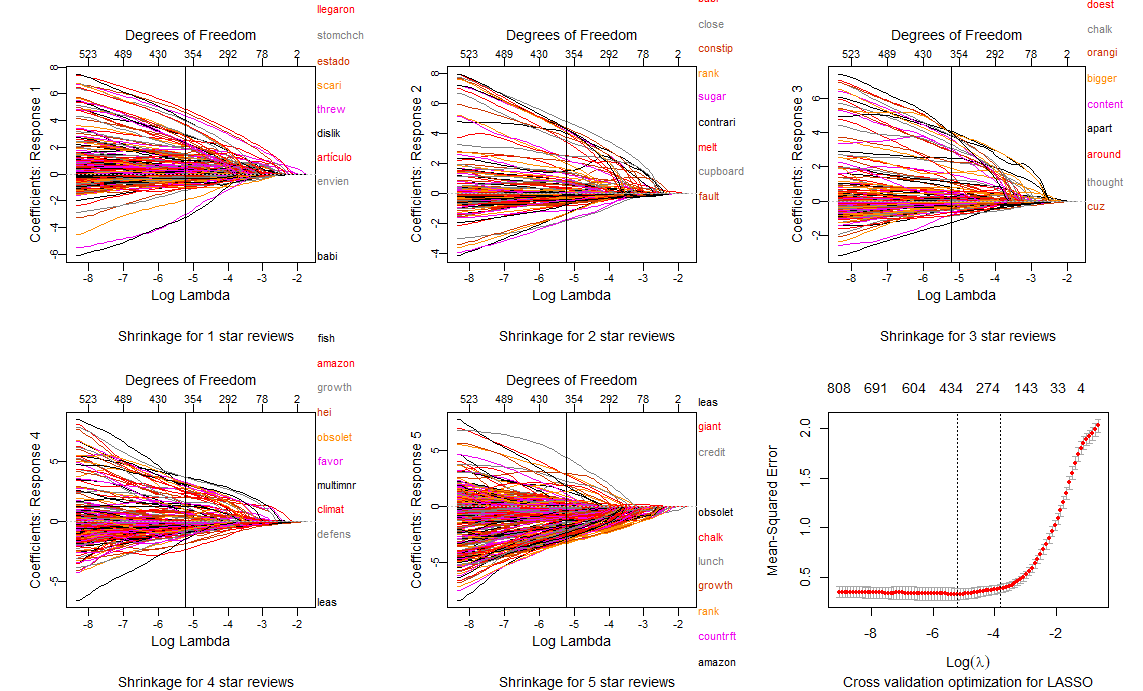

In [7]:
Image(filename="./Figures/Reviews_Shrinkage.PNG") 

As we can see for the results the 5 reviews have a very negative coefficient whenever words like chalk, obsolet, show up. On the other hand these same words show up under the 1 star reviews with positive coefficient. This is because when these words show up they indicate that the review does not like the product.  We also included the cross validation estimate for the shrinkage penalty, which is included as a vertical black line in each of the path graphs

Now that we have seen this we can try to analyze what are these words more clearly and see what words contribute the most to the different star ratings.

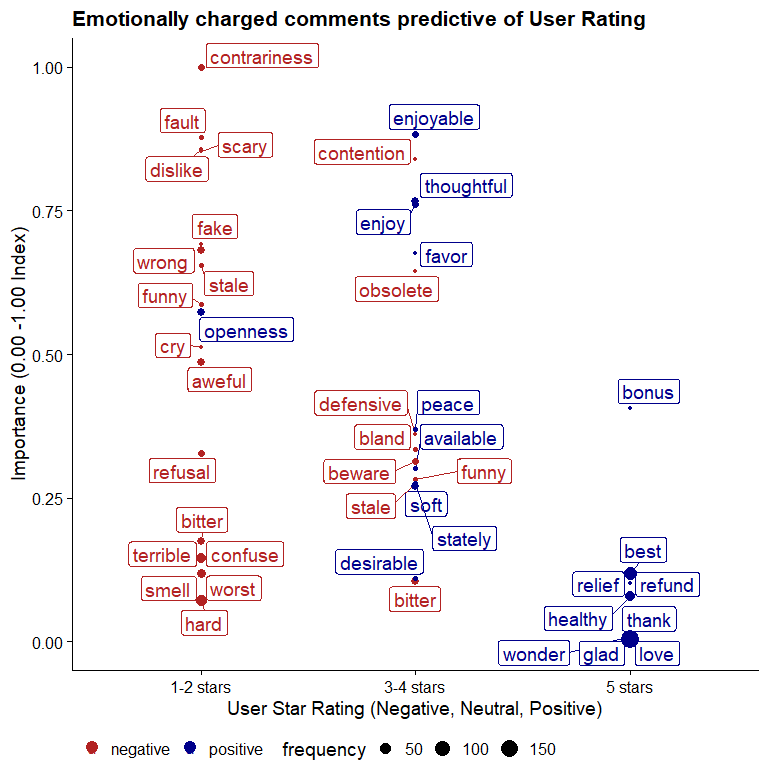

In [8]:
Image(filename="./Figures/Centrum_words.PNG") 

From this chart we see that for Negative reviews (1-2 stars) most predictive terms are just negative about the product. Words like `dislike` `funny` `aweful` or `bitter` speak to the taste of the product. Some others like `smell` are related to odor of the product. `Stale` references that the product does not stay fresh in the bottle for long. Finally some concepts like `contrariness` references that the product does not have a really as complete set of `vitamins` and `minerals` as some consumers would like.

For neutral reviews (3-4 stars) we see a mix of positive and negative terms. Users find the product `desirable` and `pleasant` but again complaints about the product going `stale` quickly (mainly in reference to gummies), or not containing all the `vitamins` and `minerals` they would want in a Multivitamins.

For positive reviews (5 stars) most important words are positive. Things like `Awesome` `perfect` `best` identify the users that really like the product. Given that on average our e-commerce reviews are 5 stars, we normally see that for a review to be negative, it must really accumulate negative terms for a user to rate them as negative.

Finally we can manually create the areas of improvement for the brand which indicate each rating group.

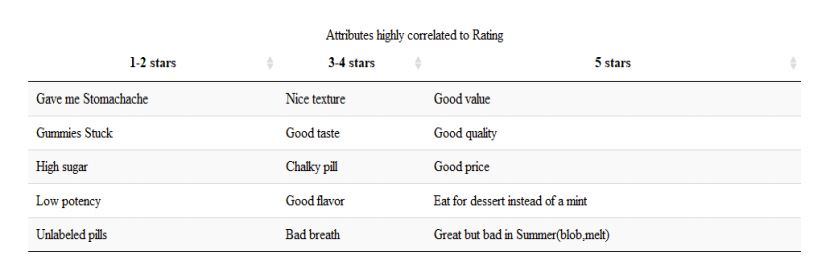

In [9]:
Image(filename="./Figures/Categories_Reviews.JPG") 

### 4B - Predicting Yelp reviews based on posted images

#### 4B.1 - Context and Model

Yelp is a well known social media site where users post their reviews. Yelp recives more than 100Million visits every day, and users spend an average of 3 minutes in the site. Normally users access the site to find restaurants or businesses. Users are very interested in getting information about the quality of the business. Users get reputation in Yelp website by posting informative pictures of the site. We are going to find pictures from different pizza restaurants in new jersey, and we are going to try predict the rating only by using the pictures posted. Our goal is, can we predict if a pizzeria is good or bad just based on pictures?

For this project we decided to take an approach similar to what it was mentioned in the paper "Visual sentiment analysis for review images with item-oriented and user-oriented CNN" (2017, Truong and Lauw). In this paper, the authors articulate a way to categorize sentiment from the ratings on Yelp. Similar to what we did in the previous algorithm for Amazon. 
Now instead of calculating sentiment we will try to estimate review rating using the images directly. 

In order to reduce processing times we are going to use pre-trained convolutions in order to ensure we can get results quicker. 

#### 4B.2. Data Collection

We used Yelp's API, but unfortunately this app does not provide an easy way for getting data. We are limited to 5000 queries per day, which is not bad for an API. However, the output that the API provides is not the best. We only get the first 3 reviews from each query we do, and additionally we don't get pictures that the user posted. So in order to get these pictures I had to get a little creative and I crawled each of the review websites that I collected from yelp. This is the reason we decided to limit our model only to one kind of business. 

We have ~3000 reviews with pictures and their respective ratings. Similar to the analyis we did for Amazon most of the reviews are 5 stars and then the lower star reviews are less likely to show up. This uneven distribution could impact the accuracy of the model, but as we will see the type of business limits the kind of pictures users post. 

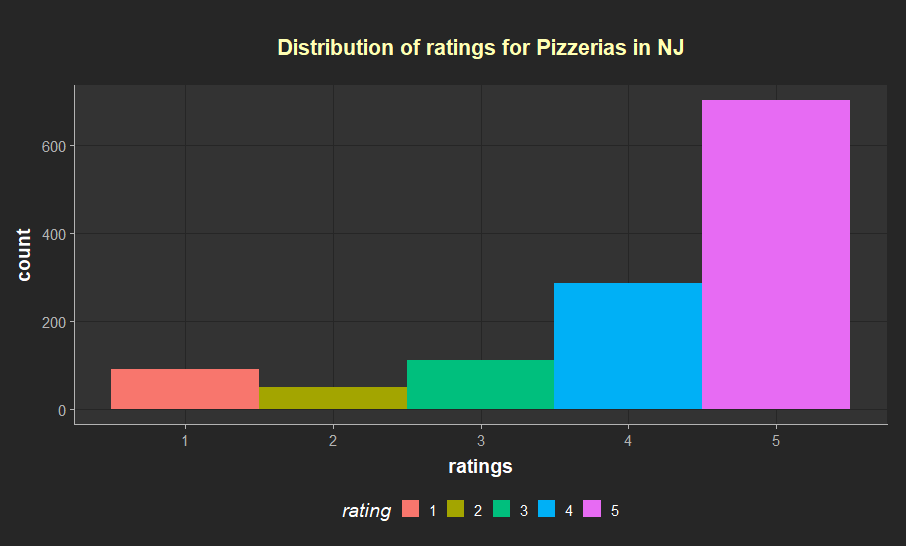

In [11]:
Image(filename="./Figures/Histogram_of_Ratings.png")

#### 4B.3 Model 

A common and highly effective approach to dealing with small dataset is to use a pretrained network. A pretrained network is a convolutional neural network where the weights have been already adjusted in identifying objects. Normally pretrained networks are developed using ImageNet, which has a large collection of everyday objects. This not only speeds up the training rate of our model, but it also helps the network to focus the training on the classifier layers closer to the target, instead of the convolutional base which takes a long time to train.. 

With the keras library, we are using VGG16 model whichi has the following architecture 

Layer (type)                     Output Shape          Param 
--------
input_1 (InputLayer)             (None, 150, 150, 3)   0
________________________________________________________________
block1_conv1 (Convolution2D)     (None, 150, 150, 64)  1792
________________________________________________________________
block1_conv2 (Convolution2D)     (None, 150, 150, 64)  36928
________________________________________________________________
block1_pool (MaxPooling2D)       (None, 75, 75, 64)    0
________________________________________________________________
block2_conv1 (Convolution2D)     (None, 75, 75, 128)   73856
________________________________________________________________
block2_conv2 (Convolution2D)     (None, 75, 75, 128)   147584
________________________________________________________________
block2_pool (MaxPooling2D)       (None, 37, 37, 128)   0
________________________________________________________________
block3_conv1 (Convolution2D)     (None, 37, 37, 256)   295168
________________________________________________________________
block3_conv2 (Convolution2D)     (None, 37, 37, 256)   590080
________________________________________________________________
block3_conv3 (Convolution2D)     (None, 37, 37, 256)   590080
________________________________________________________________
block3_pool (MaxPooling2D)       (None, 18, 18, 256)   0
________________________________________________________________
block4_conv1 (Convolution2D)     (None, 18, 18, 512)   1180160
________________________________________________________________
block4_conv2 (Convolution2D)     (None, 18, 18, 512)   2359808
________________________________________________________________
block4_conv3 (Convolution2D)     (None, 18, 18, 512)   2359808
________________________________________________________________
block4_pool (MaxPooling2D)       (None, 9, 9, 512)     0
________________________________________________________________
block5_conv1 (Convolution2D)     (None, 9, 9, 512)     2359808
________________________________________________________________
block5_conv2 (Convolution2D)     (None, 9, 9, 512)     2359808
________________________________________________________________
block5_conv3 (Convolution2D)     (None, 9, 9, 512)     2359808
________________________________________________________________
block5_pool (MaxPooling2D)       (None, 4, 4, 512)     0

Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0

We fitted a secuential model, and after running it for 30 epochs and k-fold 5, we got a recall close to 0.77 accuracy and AUC of 0.73 on the validaton set. However, our model gets quickly stuck stuck in a local minima, so in the future we will try to fix this by iterating processes.

$loss
[1] 1.569928

$Recall
[1] 0.7692308

$AUC
[1] 0.7841881

$acc
[1] 0.5555556

$Precision
[1] 0.3846154

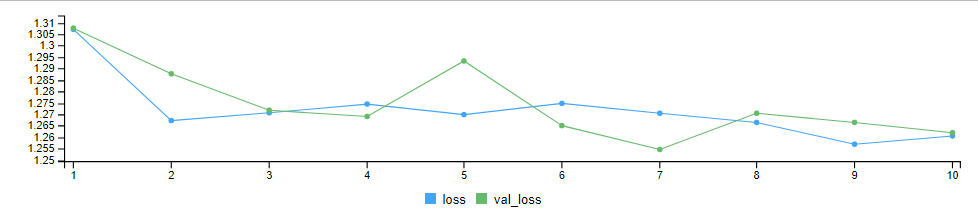

In [24]:
Image(filename="./Script/yelp/lossfunction2.png")

We can also explore what are the picture features that make up for a positive or for a negative review. According to our model pictures like this are representative of positive reviews.

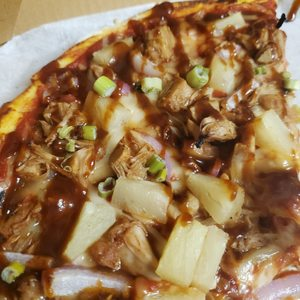

In [21]:
Image(filename="./Script/yelp/model/train/5/246.jpg")

In [ ]:
Image(filename="./Script/yelp/model/train/5/235.jpg")

On the other hand pictures like the ones below are predictive of low scores on the reviews. 

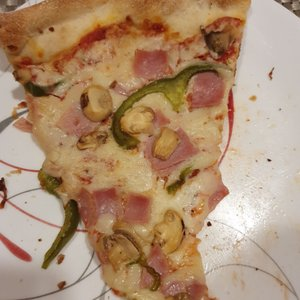

In [18]:
Image(filename="./Script/yelp/model/train/2/36.jpg")

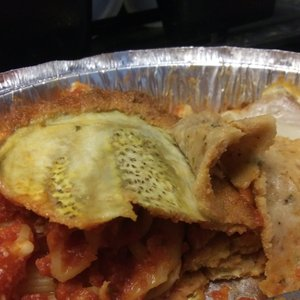

In [19]:
Image(filename="./Script/yelp/model/train/2/987.jpg")

It's not suprising to see that the model is finding that whenever users show the product it seems to be predictive of good quality of the place. However when the picture is about dirt on the table, showing a bill or something else, its indicative the food was not worth the other issues.

### 5- Conclusions and Future areas of study

During this semester I deepened my understanding of Natural language processing. I now understand that linguistic structures can be thought of probabilistic distributions and our models are trying to replicate the information contained in those distributions. 

In order to successfully, implement NLP solutions its important to know what is it going to be used for, and in combination with what data is going to be used. If we are going to be using text data in combination with a numeric or categorical target variable, we need to transform the text into some vector representation, like word2vec embeddings and such. 

We have seen that is pretty easy to develop algorithms that can (without providing pre-built lexica) that obtain accurate inferences about a target variable. However in both image decomposition and NLP we have to decompose the the structures into more simplistic features to reduce the perplexity of the model. That way our algorithms can learn better what are the most important features. In terms of image recognition this is done via convolution and in text this can be done with shrinkage or with hashing trick.

When we try to include only pictures to predict rating the accuracy drops but it really depends on the category selected. Some pictures are not very telling of the actual rating, so more tests with different categories must be performed.

In future areas of development we will add a third algorithm that does a two step process and combines NLP with Image processing in order to estimate sentiment analysis on twitter posts. The model uses NLP sentiment to identify context to images and then uses this learning to predict sentiment with or without text. For this however we will need to be able to extract a large enough dataset for the analysis. 

## 6-Appendix: Bibliographic references

Contents in this report where built upon the learnings from the following textbooks.

- Foundations of Statistical Natural Language Processing (Manning & Schutze)
- Deep Learning Models with R (Chollet & Allaire)
- Deep learning for NLP (Raaijmakers)
- Natural Language Processing with Python (Bird, Klein & Loper) 